# Confesor, HW4-Building and applying a classification model

## EDA
```
The standard deviation for the wine model data set and the wine predict data set is pretty small (except for proline) could mean that parameters despite class distinctions are close to one another.
When plotting the initial data with scatterplots, the defined classes (Class 0, 1, and 2) all overlap with one another.
This means clustering may be difficult and that this model may be able to define clusters clearly.
```

In [1]:
#Keep figures inline
%matplotlib inline

## IMPORT PACKAGES
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean as cmo

#Train test splitting of data package
from sklearn.model_selection import train_test_split

# scaling the training data!!
from sklearn.preprocessing import StandardScaler

#MLPClassifier (Multi-layer Perceptron classifier)
# https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/
from sklearn.neural_network import MLPClassifier

#Testing predictions
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
## IMPORT WINE DATASET FROM SKLEARN 
from sklearn.datasets import load_wine
Wine = load_wine()
Wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
# data, target_names, target, feature_names
print(Wine.target)
print(Wine.target_names)
print(Wine.feature_names)

# Feature matrix in a object named X
x = Wine.data
# response vector in a object named y
y = Wine.target

print(np.shape(x))
print(np.shape(y))
print(x)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
(178, 13)
(178,)
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.1

In [4]:
#Stats on features
WineData=pd.DataFrame(x, columns=[Wine.feature_names]) 
WineData

alcohol malic_acid   ash alcalinity_of_ash magnesium total_phenols  \
0     14.23       1.71  2.43              15.6     127.0          2.80   
1     13.20       1.78  2.14              11.2     100.0          2.65   
2     13.16       2.36  2.67              18.6     101.0          2.80   
3     14.37       1.95  2.50              16.8     113.0          3.85   
4     13.24       2.59  2.87              21.0     118.0          2.80   
..      ...        ...   ...               ...       ...           ...   
173   13.71       5.65  2.45              20.5      95.0          1.68   
174   13.40       3.91  2.48              23.0     102.0          1.80   
175   13.27       4.28  2.26              20.0     120.0          1.59   
176   13.17       2.59  2.37              20.0     120.0          1.65   
177   14.13       4.10  2.74              24.5      96.0          2.05   

    flavanoids nonflavanoid_phenols proanthocyanins color_intensity   hue  \
0         3.06                 0.28            2.29            5.64  1.04   
1         2.76                 0.26            1.28            4.38  1.05   
2         3.24                 0.30            2.81            5.68  1.03   
3         3.49                 0.24            2.18            7.80  0.86   
4         2.69                 0.39            1.82            4.32  1.04   
..         ...                  ...             ...             ...   ...   
173       0.61                 0.52            1.06            7.70  0.64   
174       0.75                 0.43            1.41            7.30  0.70   
175       0.69                 0.43            1.35           10.20  0.59   
176       0.68                 0.53            1.46            9.30  0.60   
177       0.76                 0.56            1.35            9.20  0.61   

    od280/od315_of_diluted_wines proline  
0                           3.92  1065.0  
1                           3.40  1050.0  
2                           3.17  1185.0  
3                           3.45  1480.0  
4                           2.93   735.0  
..                           ...     ...  
173                         1.74   740.0  
174                         1.56   750.0  
175                         1.56   835.0  
176                         1.62   840.0  
177                         1.60   560.0  

[178 rows x 13 columns]

In [276]:
WineData[['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols',
          'proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']].agg(['std','mean','median','max','min'])
#Seems like Proline has values that are far away from the mean, while nonflavanoid phenols are generally close to the mean (stddev).

alcohol malic_acid       ash alcalinity_of_ash   magnesium  \
std      0.811827   1.117146  0.274344          3.339564   14.282484   
mean    13.000618   2.336348  2.366517         19.494944   99.741573   
median  13.050000   1.865000  2.360000         19.500000   98.000000   
max     14.830000   5.800000  3.230000         30.000000  162.000000   
min     11.030000   0.740000  1.360000         10.600000   70.000000   

       total_phenols flavanoids nonflavanoid_phenols proanthocyanins  \
std         0.625851   0.998859             0.124453        0.572359   
mean        2.295112   2.029270             0.361854        1.590899   
median      2.355000   2.135000             0.340000        1.555000   
max         3.880000   5.080000             0.660000        3.580000   
min         0.980000   0.340000             0.130000        0.410000   

       color_intensity       hue od280/od315_of_diluted_wines      proline  
std           2.318286  0.228572                     0.709990   314.907474  
mean          5.058090  0.957449                     2.611685   746.893258  
median        4.690000  0.965000                     2.780000   673.500000  
max          13.000000  1.710000                     4.000000  1680.000000  
min           1.280000  0.480000                     1.270000   278.000000

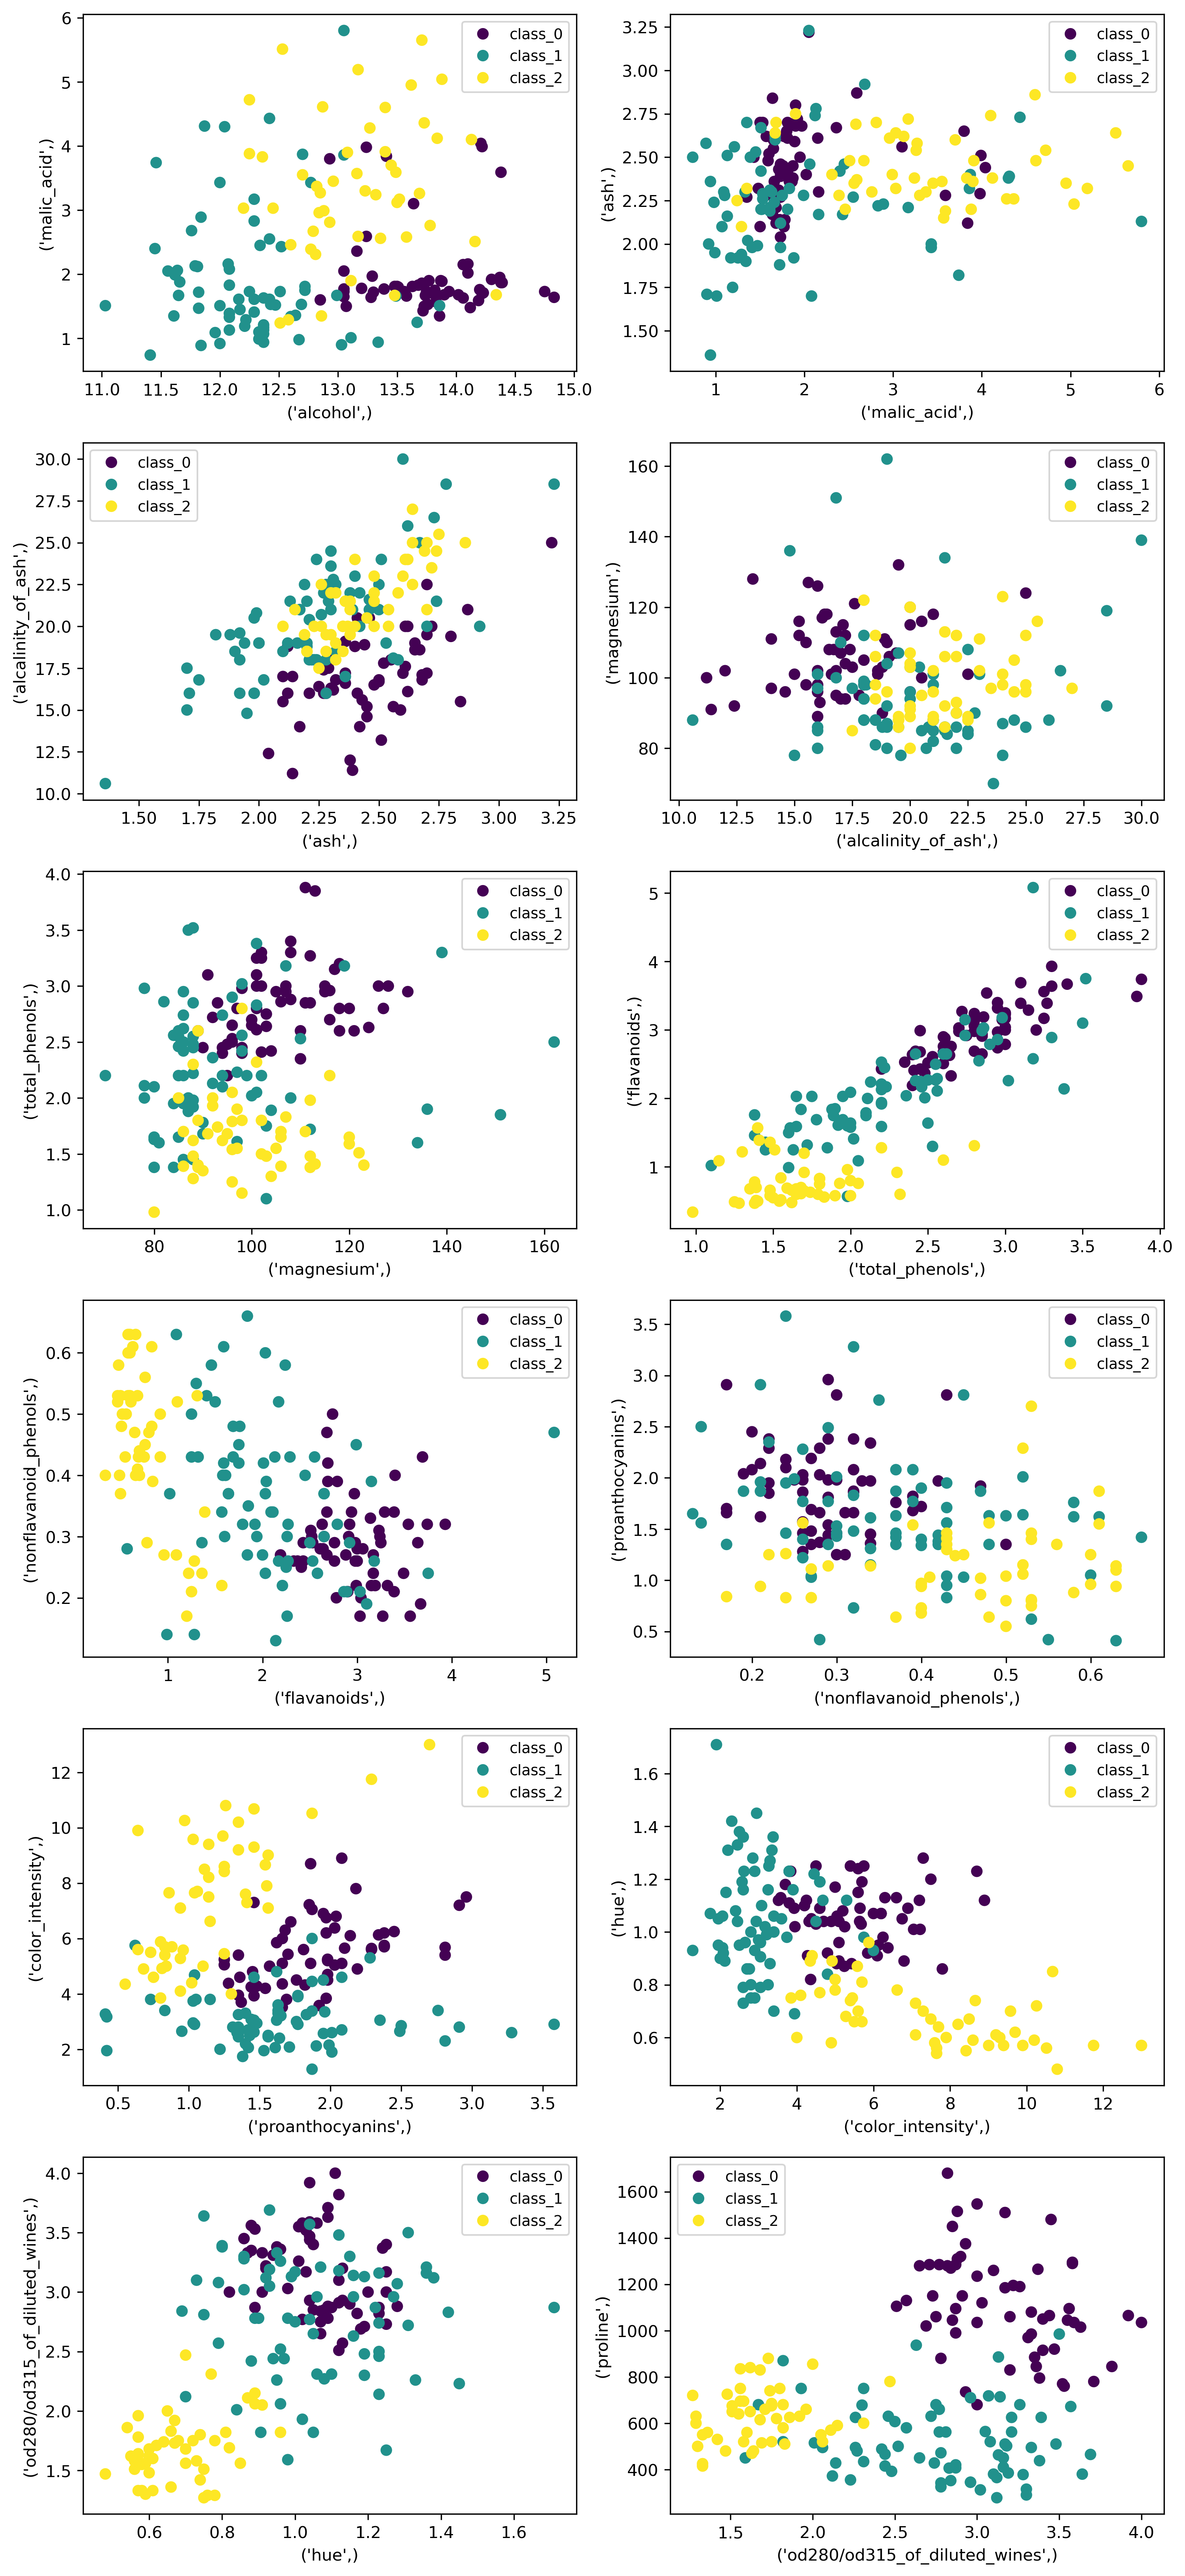

In [140]:
# take a quick look at the data

nrows, ncols = 7, 2 #set 6 rows and 2 columns
fig = plt.figure(figsize = (10,25), dpi = 300)

for i in range(1, 13): #i will iterate from 1 through 13
    ax = fig.add_subplot(nrows, ncols, i) #add subplot one at a time (#rows and columns, i is the position)
    PltScat=ax.scatter(WineData.iloc[:,i-1], WineData.iloc[:,i],c=y) #based on number of the column iloc is index location i-1 (starting point @ 0), i
    Label=Wine.target_names
    ax.legend(PltScat.legend_elements()[0],Label,prop = {'size' : 9})
    ax.set_xlabel(WineData.columns[i-1])
    ax.set_ylabel(WineData.columns[i])
plt.tight_layout()
plt.show()

#It seems that Class 1 overlaps with Class 0 & 2 (lots of overlapping, clustering may be difficult/this model may not
#define clusters clearly)

In [7]:
## PREDICT DATASET
infile1='unknown_wine.csv'
WinePredict = pd.read_csv(infile1, sep= ',', low_memory=False, na_filter=True)
WinePredict

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0   2.480115    1.577093  1.766757           7.542816  43.456511   
1   1.074171    1.125832  2.557246           4.421963  57.339151   
2   3.516777    0.819709  0.462774           2.328977  60.776751   
3  13.189798    1.402826  0.153316           7.621558   0.440191   
4  11.973053    1.838887  0.945975           1.269000  83.484182   
5   2.284138    0.048992  0.211198           4.088945  18.957613   
6   9.463899    0.787199  1.863438          16.869074  31.736868   
7   6.453939    1.676532  2.153574          13.765152  70.390073   
8  12.740552    2.854646  0.932969           8.626371  44.557706   
9   9.686586    1.232883  1.475132           3.560106  12.221049   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.569810    0.075239              0.267335         0.744527   
1       1.677453    1.027255              0.266734         1.037521   
2       0.950360    2.312480              0.114245         1.453748   
3       0.103332    2.878385              0.016165         1.558074   
4       0.934233    0.448263              0.038872         0.488293   
5       1.192519    1.647511              0.005231         1.038589   
6       1.470403    0.534720              0.206582         0.633736   
7       1.749210    2.721021              0.252128         0.152867   
8       0.405552    1.105890              0.219005         0.393723   
9       1.229565    1.495698              0.153813         0.886209   

   color_intensity       hue  od280/od315_of_diluted_wines      proline  
0         0.975456  0.741519                      2.763938  1228.781864  
1         6.093875  0.400008                      2.629353   620.263632  
2         1.566772  0.249111                      0.948954   417.939695  
3         5.961709  0.338151                      1.608835   233.606713  
4         4.358916  0.482324                      0.084788   387.198226  
5         2.101098  0.237541                      1.672787   121.134473  
6         4.444610  0.033384                      0.925355   328.508943  
7         0.582114  0.507068                      2.055239    59.729064  
8         2.706763  0.983953                      1.070769   250.301469  
9         1.506817  0.939698                      0.921325   187.457035

In [8]:
WinePredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       10 non-null     float64
 1   malic_acid                    10 non-null     float64
 2   ash                           10 non-null     float64
 3   alcalinity_of_ash             10 non-null     float64
 4   magnesium                     10 non-null     float64
 5   total_phenols                 10 non-null     float64
 6   flavanoids                    10 non-null     float64
 7   nonflavanoid_phenols          10 non-null     float64
 8   proanthocyanins               10 non-null     float64
 9   color_intensity               10 non-null     float64
 10  hue                           10 non-null     float64
 11  od280/od315_of_diluted_wines  10 non-null     float64
 12  proline                       10 non-null     float64
dtypes: float

In [9]:
WinePredict[['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols',
          'proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']].agg(['std','mean','median','max','min'])

#Wine predict values follow the same trend as the scikit learn dataset where proline has the largest standard deviation, 
# while nonflavanoid phenols are a small standard deviation.


alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
std      4.698497    0.746597  0.837576           5.034407  26.609545   
mean     7.286303    1.336460  1.252238           7.009396  42.336010   
median   7.958919    1.317854  1.210554           5.982389  44.007109   
max     13.189798    2.854646  2.557246          16.869074  83.484182   
min      1.074171    0.048992  0.153316           1.269000   0.440191   

        total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
std          0.544932    0.969687              0.104424         0.449637   
mean         1.028244    1.424646              0.154011         0.838729   
median       1.071439    1.300794              0.180197         0.815368   
max          1.749210    2.878385              0.267335         1.558074   
min          0.103332    0.075239              0.005231         0.152867   

        color_intensity       hue  od280/od315_of_diluted_wines      proline  
std            2.038277  0.311133                      0.841204   337.817868  
mean           3.029813  0.491276                      1.468134   383.492111  
median         2.403930  0.441166                      1.339802   289.405206  
max            6.093875  0.983953                      2.763938  1228.781864  
min            0.582114  0.033384                      0.084788    59.729064

## HYPERPARAMETER SPACE
```
A MLPClassifier Model was built using hidden layer sizes of 10,10,10 with 1000 iterations.
The number of layers that yields the most accurate score results are at 5 & 6 (100%). 
All the other layer sizes are around or below 97%.
In general, all the layers within this range is above 90%. 
This means that each layer has the possibility of classifying things accurately. 
I would use the layer sizes that have an accuracy score of less than 1 (everything exclusing 5 & 6) because of overfitting.
(I stuck with the 10,10,10 with 1000 iterations).
If the model fits to the scikit winedataset too closely, it has less capability to classify unknowns accurately.

The confusion matrix tells us the model's prediction performance (false positives and false negatives).
For the model with the 1,1,1 layer, it classifys class 1 as class 0 which does not seem accurate.
Precision tells us what proportion of true positives are actuall correct (TP/(TP+FP).
Recall is what proportion of actual positives are identified correctly (TP/(TP+FN)).
F1 score is the model performance measurment (2*[(precision*recall)/(precision+recall)]) OR = (TP)/[(TP)+(1/2)(FP+FN)].
Any value above 0.90 for each is good.
After looking at these parameters, I still chose the 10,10,10 with 1000 iterations for the MLPClassifier.
Other layers yielded the same results (except for 1 & 2 layers), 
however I had read from literature that increased layers can improve accuracy in the model to a certain degree.
1 & 2 layers caused some classifications to be overfitted so I wouldn't use those parameters.
4 layers yielded in perfect (1) F1,precision,and recall scores, possibly due to overfitting so I did not use that either.
```

In [10]:
## MODEL CONSTRUCTION

# Split wine data in train and test data (80:20)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)


scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
## EXPLORE HYPERPARAMETER SPACE- what layers to use for model
#Define a hyper-parameter space to search. (All the values that you want to try out)
#https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa
#Loop to test how well different number of hidden layers performs

scores = {}
scores_list = []
l_range = range(1, 20, 1)

from sklearn import metrics

for l in l_range:
    print(l)
    mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    scores[l] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))


1
2
3


C:\Users\krist\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0.5, 1.0, 'Model Accuracy for k (hidden layer sizes)')

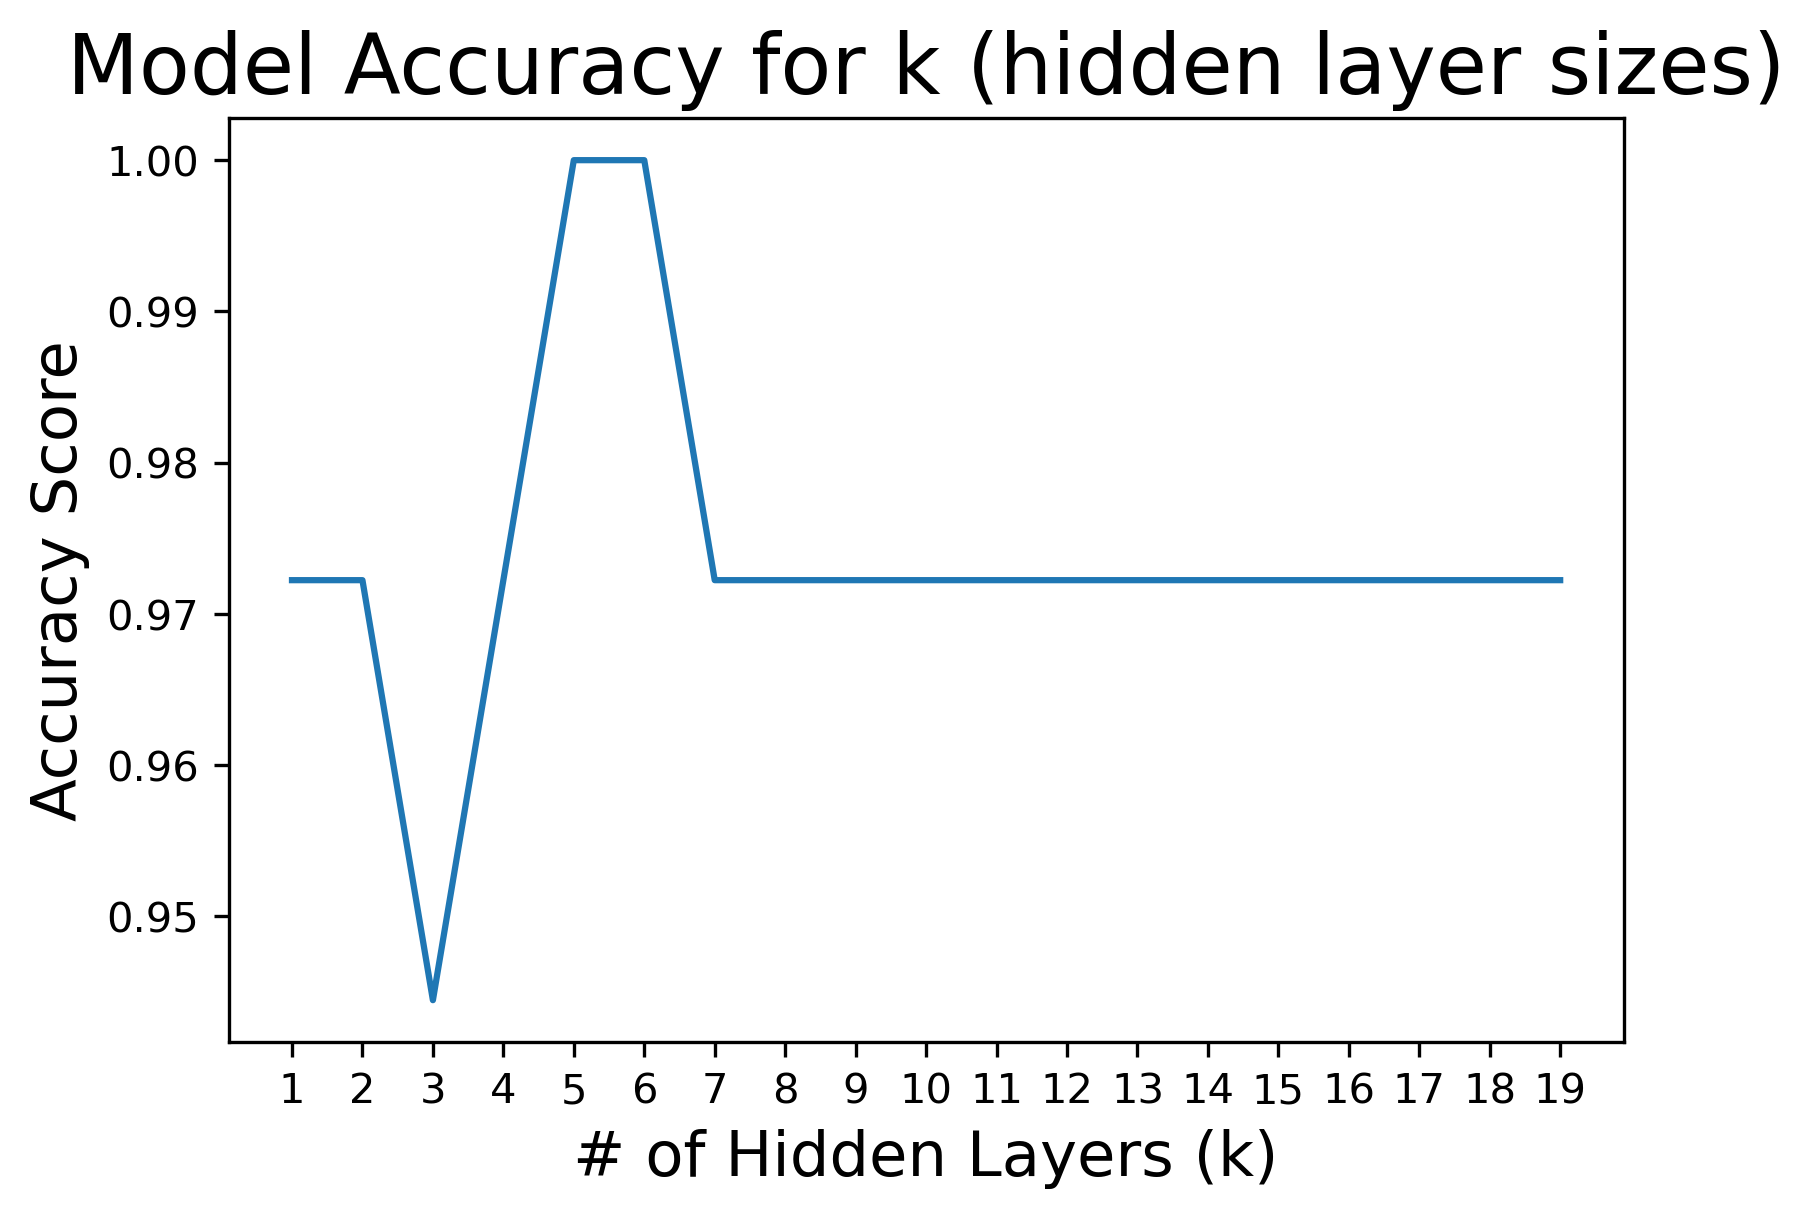

In [13]:
# plot the model accuracy for each value of k
Fig1= plt.figure(figsize = (6,4), dpi = 300)
plt.plot(l_range,scores_list)
plt.xticks(np.arange(min(l_range), max(l_range)+1, 1.0))
plt.xlabel('# of Hidden Layers (k)',size=15)
plt.ylabel('Accuracy Score',size=15)
plt.title('Model Accuracy for k (hidden layer sizes)',size=20)

#The number of layers that yields the most accurate results are at 5 & 6 (100%). All the other layer sizes are around or below 97%.
#All the layers within this range is above 90% which is good, this means that each layer has the possibility of classifying things accurately. 
#I would use the layer sizes that have an accuracy score of less than 1 (everything exclusing 5 & 6).
#This is because of overfitting- if the model fits to the scikit winedataset too closely, 
#it has less capability to predict the classification of unknowns accurately.


[[10  0  0]
 [13  0  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13
           2       1.00      1.00      1.00        13

    accuracy                           0.64        36
   macro avg       0.48      0.67      0.54        36
weighted avg       0.48      0.64      0.53        36



C:\Users\krist\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\krist\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krist\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krist\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill

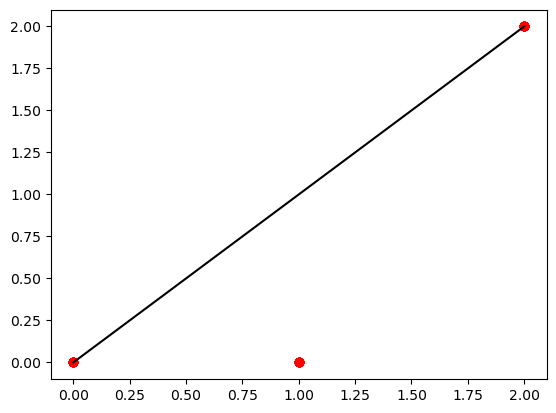

In [14]:
#Neural network using MLPClassifier 

#Going through all of the hidden layers calculated above
# classifier with 1 layer model
# max_iter= # of epochs
#1 epoch = combination of one cycle of feed-forward and back propagation phase.
mlp1 = MLPClassifier(hidden_layer_sizes=(1,1,1), max_iter=1000)

# now fit the classifer to the training data
mlp1.fit(X_train, y_train)
# Predictions with classifier
predictions1 = mlp1.predict(X_test)

plt.plot(y_test, predictions1, 'ro')
plt.plot([0, 2], [0, 2],'k')


#confusion matrix to determine the accuracy ( total # of correct predictions / by the total # of all predictions)
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))
#1 layer is not good (precision, recall, f1scores are all less than 0.90)

#Confusion matrix tells us the model's prediction performance (false positives and false negatives)-this model classifys class 1 as class 0
#Precision tells us what proportion of true positives are actuall correct (TP/(TP+FP)
#Recall is what proportion of actual positives are identified correctly (TP/(TP+FN))
#F1 score is the model performance measurment (2*[(precision*recall)/(precision+recall)]) OR = (TP)/[(TP)+(1/2)(FP+FN)]
#Any value above 0.90 is pretty accurate

[[ 0 10  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.54      1.00      0.70        13
           2       1.00      0.92      0.96        13

    accuracy                           0.69        36
   macro avg       0.51      0.64      0.55        36
weighted avg       0.56      0.69      0.60        36



C:\Users\krist\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krist\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krist\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


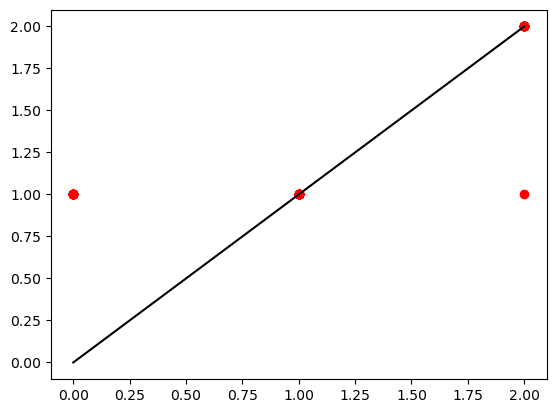

In [15]:
# classifier with 2 layer model
# max_iter= # of epochs
#1 epoch = combination of one cycle of feed-forward and back propagation phase.
mlp2 = MLPClassifier(hidden_layer_sizes=(2,2,2), max_iter=1000)

# now fit the classifer to the training data
mlp2.fit(X_train, y_train)
# Predictions with classifier
predictions2 = mlp2.predict(X_test)

plt.plot(y_test, predictions2, 'ro')
plt.plot([0, 2], [0, 2],'k')


#confusion matrix to determine the accuracy ( total # of correct predictions / by the total # of all predictions)
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))
#2 layer is not good (precision, recall, f1scores are all less than 0.90)

[[ 9  0  1]
 [ 0 13  0]
 [ 0  2 11]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.87      1.00      0.93        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



C:\Users\krist\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


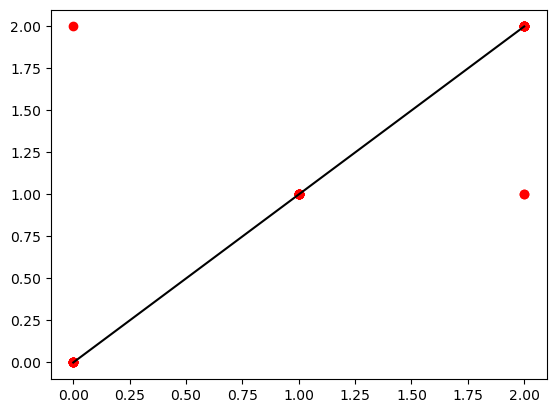

In [16]:
# classifier with 3 layer model
# max_iter= # of epochs
#1 epoch = combination of one cycle of feed-forward and back propagation phase.
mlp3 = MLPClassifier(hidden_layer_sizes=(3,3,3), max_iter=1000)

# now fit the classifer to the training data
mlp3.fit(X_train, y_train)
# Predictions with classifier
predictions3 = mlp3.predict(X_test)

plt.plot(y_test, predictions3, 'ro')
plt.plot([0, 2], [0, 2],'k')


#confusion matrix to determine the accuracy ( total # of correct predictions / by the total # of all predictions)
print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))

#3 layer is good (precision, recall, f1scores are all greater than 0.90)

[[10  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



C:\Users\krist\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


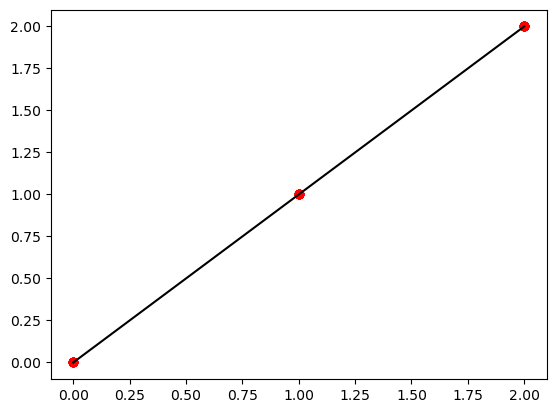

In [18]:
# classifier with 4 layer model
# max_iter= # of epochs
#1 epoch = combination of one cycle of feed-forward and back propagation phase.
mlp4 = MLPClassifier(hidden_layer_sizes=(4,4,4), max_iter=1000)

# now fit the classifer to the training data
mlp4.fit(X_train, y_train)
# Predictions with classifier
predictions4 = mlp4.predict(X_test)

plt.plot(y_test, predictions4, 'ro')
plt.plot([0, 2], [0, 2],'k')


#confusion matrix to determine the accuracy ( total # of correct predictions / by the total # of all predictions)
print(confusion_matrix(y_test,predictions4))
print(classification_report(y_test,predictions4))
#4 layer is not good (precision, recall, f1scores are all 1,perhaps overfitted)

[[10  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



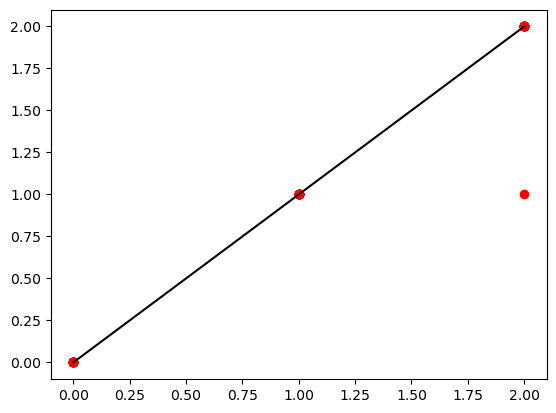

In [19]:
# classifier with 5 layer model
# max_iter= # of epochs
#1 epoch = combination of one cycle of feed-forward and back propagation phase.
mlp5 = MLPClassifier(hidden_layer_sizes=(5,5,5), max_iter=1000)

# now fit the classifer to the training data
mlp5.fit(X_train, y_train)
# Predictions with classifier
predictions5 = mlp5.predict(X_test)

plt.plot(y_test, predictions5, 'ro')
plt.plot([0, 2], [0, 2],'k')


#confusion matrix to determine the accuracy ( total # of correct predictions / by the total # of all predictions)
print(confusion_matrix(y_test,predictions5))
print(classification_report(y_test,predictions5))
#5 layer is good (precision, recall, f1scores are all greater than 0.9)

[[10  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



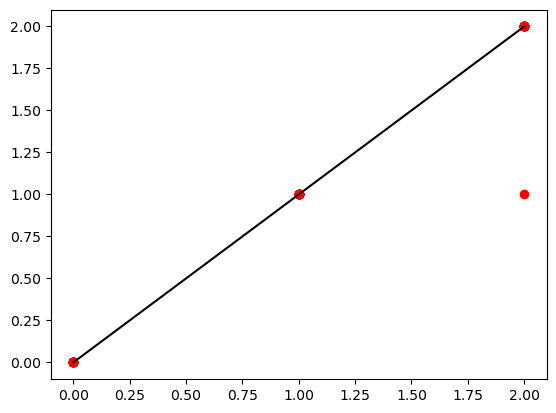

In [20]:
# classifier with 6 layer model
# max_iter= # of epochs
#1 epoch = combination of one cycle of feed-forward and back propagation phase.
mlp6 = MLPClassifier(hidden_layer_sizes=(6,6,6), max_iter=1000)

# now fit the classifer to the training data
mlp6.fit(X_train, y_train)
# Predictions with classifier
predictions6 = mlp6.predict(X_test)

plt.plot(y_test, predictions6, 'ro')
plt.plot([0, 2], [0, 2],'k')


#confusion matrix to determine the accuracy ( total # of correct predictions / by the total # of all predictions)
print(confusion_matrix(y_test,predictions6))
print(classification_report(y_test,predictions6))
#6 layer is good (precision, recall, f1scores are all greater than 0.9)

[[10  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



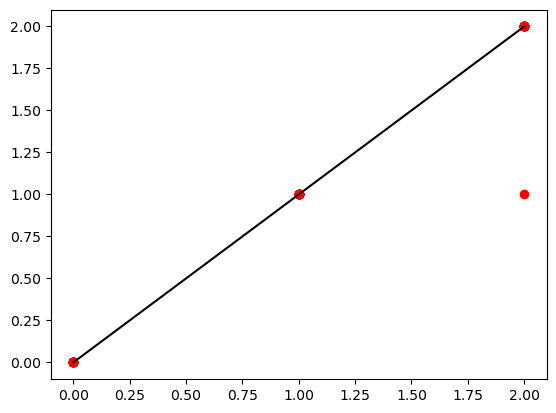

In [21]:
# classifier with 7 layer model
# max_iter= # of epochs
#1 epoch = combination of one cycle of feed-forward and back propagation phase.
mlp7 = MLPClassifier(hidden_layer_sizes=(7,7,7), max_iter=1000)

# now fit the classifer to the training data
mlp7.fit(X_train, y_train)
# Predictions with classifier
predictions7 = mlp7.predict(X_test)

plt.plot(y_test, predictions7, 'ro')
plt.plot([0, 2], [0, 2],'k')


#confusion matrix to determine the accuracy ( total # of correct predictions / by the total # of all predictions)
print(confusion_matrix(y_test,predictions7))
print(classification_report(y_test,predictions7))
#7 layer is good (precision, recall, f1scores are all greater than 0.9)

[[10  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



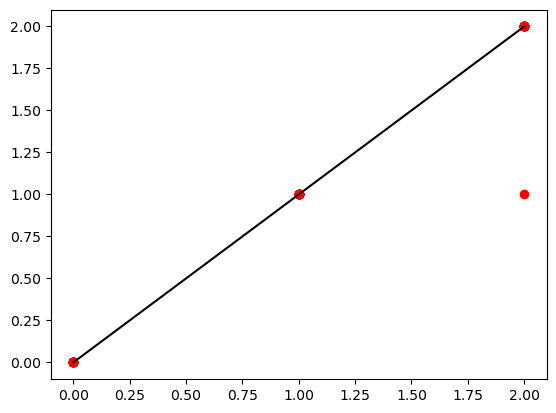

In [22]:
# classifier with 8 layer model
# max_iter= # of epochs
#1 epoch = combination of one cycle of feed-forward and back propagation phase.
mlp8 = MLPClassifier(hidden_layer_sizes=(8,8,8), max_iter=1000)

# now fit the classifer to the training data
mlp8.fit(X_train, y_train)
# Predictions with classifier
predictions8 = mlp8.predict(X_test)

plt.plot(y_test, predictions8, 'ro')
plt.plot([0, 2], [0, 2],'k')


#confusion matrix to determine the accuracy ( total # of correct predictions / by the total # of all predictions)
print(confusion_matrix(y_test,predictions8))
print(classification_report(y_test,predictions8))
#8 layer is good (precision, recall, f1scores are all greater than 0.9)

[[10  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



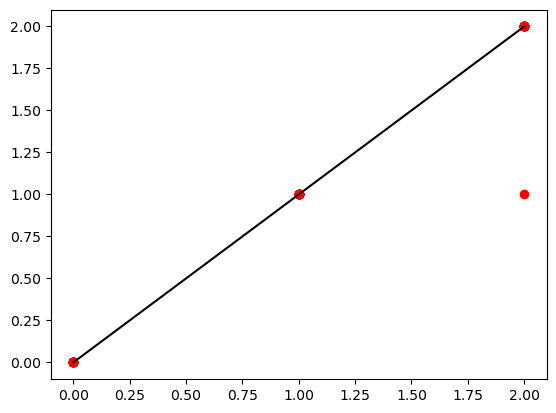

In [23]:
# classifier with 9 layer model
# max_iter= # of epochs
#1 epoch = combination of one cycle of feed-forward and back propagation phase.
mlp9 = MLPClassifier(hidden_layer_sizes=(9,9,9), max_iter=1000)

# now fit the classifer to the training data
mlp9.fit(X_train, y_train)
# Predictions with classifier
predictions9 = mlp9.predict(X_test)

plt.plot(y_test, predictions9, 'ro')
plt.plot([0, 2], [0, 2],'k')


#confusion matrix to determine the accuracy ( total # of correct predictions / by the total # of all predictions)
print(confusion_matrix(y_test,predictions9))
print(classification_report(y_test,predictions9))
#9 layer is good (precision, recall, f1scores are all greater than 0.9)

[[10  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



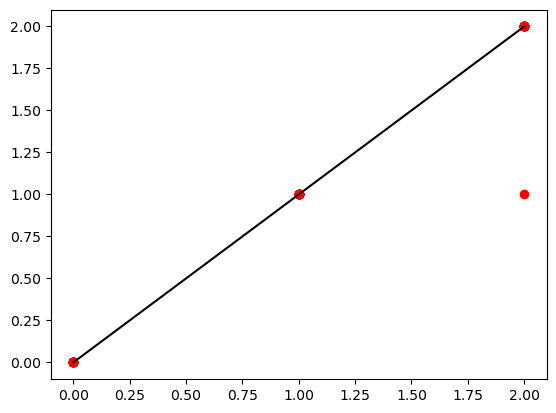

In [289]:
# classifier with 19 layer model
# max_iter= # of epochs
#1 epoch = combination of one cycle of feed-forward and back propagation phase.
mlp10 = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)

# now fit the classifer to the training data
mlp10.fit(X_train, y_train)
# Predictions with classifier
predictions10 = mlp10.predict(X_test)

plt.plot(y_test, predictions10, 'ro')
plt.plot([0, 2], [0, 2],'k')


#confusion matrix to determine the accuracy ( total # of correct predictions / by the total # of all predictions)
print(confusion_matrix(y_test,predictions10))
print(classification_report(y_test,predictions10))
#10 layer is good (precision, recall, f1scores are all greater than 0.9)

#Based off of the confusion matrix, precision, recall, and f1 scores, layers that score a weighted average of 0.97
#seem to be the best as it does not overfit data but still allows room for predictions-using mlp10 in this instant.

## APPLYING TUNED MODEL
```
My model is predicting the probability of the unknowns as mostly Class 1 (with a 100% certainty). 
There is one sample where it is only 28%, where it is more likely to be classified as Class 2.
In general, it is unlikely that the unknowns are Class 0 or Class 2.
This makes sense since Class 1 severely overlaps both of the other two classes, it is hard to distinguish all 3 classes when Class 1 overlaps in all clusters.
When plotting model clusters vs predicted classes of the unknown wine data, you can see the severe overlapping of the model classes- Class 1,2,and 3 clusters are way too close together.
The only unknown classified as Class 2 is seen to overlap with Class 1 multiple times (color intensity vs proanthocyanins).
The wine scikit learn data set isn't a very good dataset to build a classification model from due to the severe overlapping of all classes on the bases of most parameters.
More separated clusters and less overlapping model datasets would make the mlp model making more defined.
```

In [31]:
# here we apply the new model built above to 'new' data

classes = {0:'Class 0',1:'Class 1',2:'Class 2'}

# Make a prediction for the 'new' data 
# predict for the below two random observations
x_new = WinePredict
x_new_scaled = scaler.transform(x_new)



C:\Users\krist\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [285]:
y_predict = mlp10.predict(x_new_scaled)
print(classes[y_predict[0]])
print(classes[y_predict[1]])
print(classes[y_predict[2]])
print(classes[y_predict[3]])
print(classes[y_predict[4]])
print(classes[y_predict[5]])
print(classes[y_predict[6]])
print(classes[y_predict[7]])
print(classes[y_predict[8]])
print(classes[y_predict[9]])

#probability that each unknown wine fits into target classes
predictprob=mlp10.predict_proba(x_new_scaled)
Report= pd.DataFrame(predictprob)
Report

#My model is predicting the probability of the unknowns as mostly Class 1 (with a 100% certainty). 
#There is one sample where it is only 28%, where it is more likely to be classified as Class 2.
#It is unlikely that the unknowns are Class 0 or Class 2.
#This makes sense since Class 1 severely overlaps both of the other two classes
#Could also be due to overfitting

Class 1
Class 1
Class 1
Class 1
Class 2
Class 1
Class 1
Class 1
Class 1
Class 1


0         1             2
0  5.891392e-28  1.000000  4.085965e-23
1  5.866532e-21  1.000000  2.891091e-17
2  5.006183e-26  1.000000  6.888482e-23
3  3.407852e-13  1.000000  1.556122e-11
4  2.039306e-02  0.280253  6.993535e-01
5  1.179399e-32  1.000000  5.747635e-29
6  2.107898e-12  1.000000  1.265686e-08
7  6.623469e-18  1.000000  6.922471e-16
8  9.103311e-10  1.000000  1.336101e-07
9  3.545983e-15  1.000000  2.387903e-13

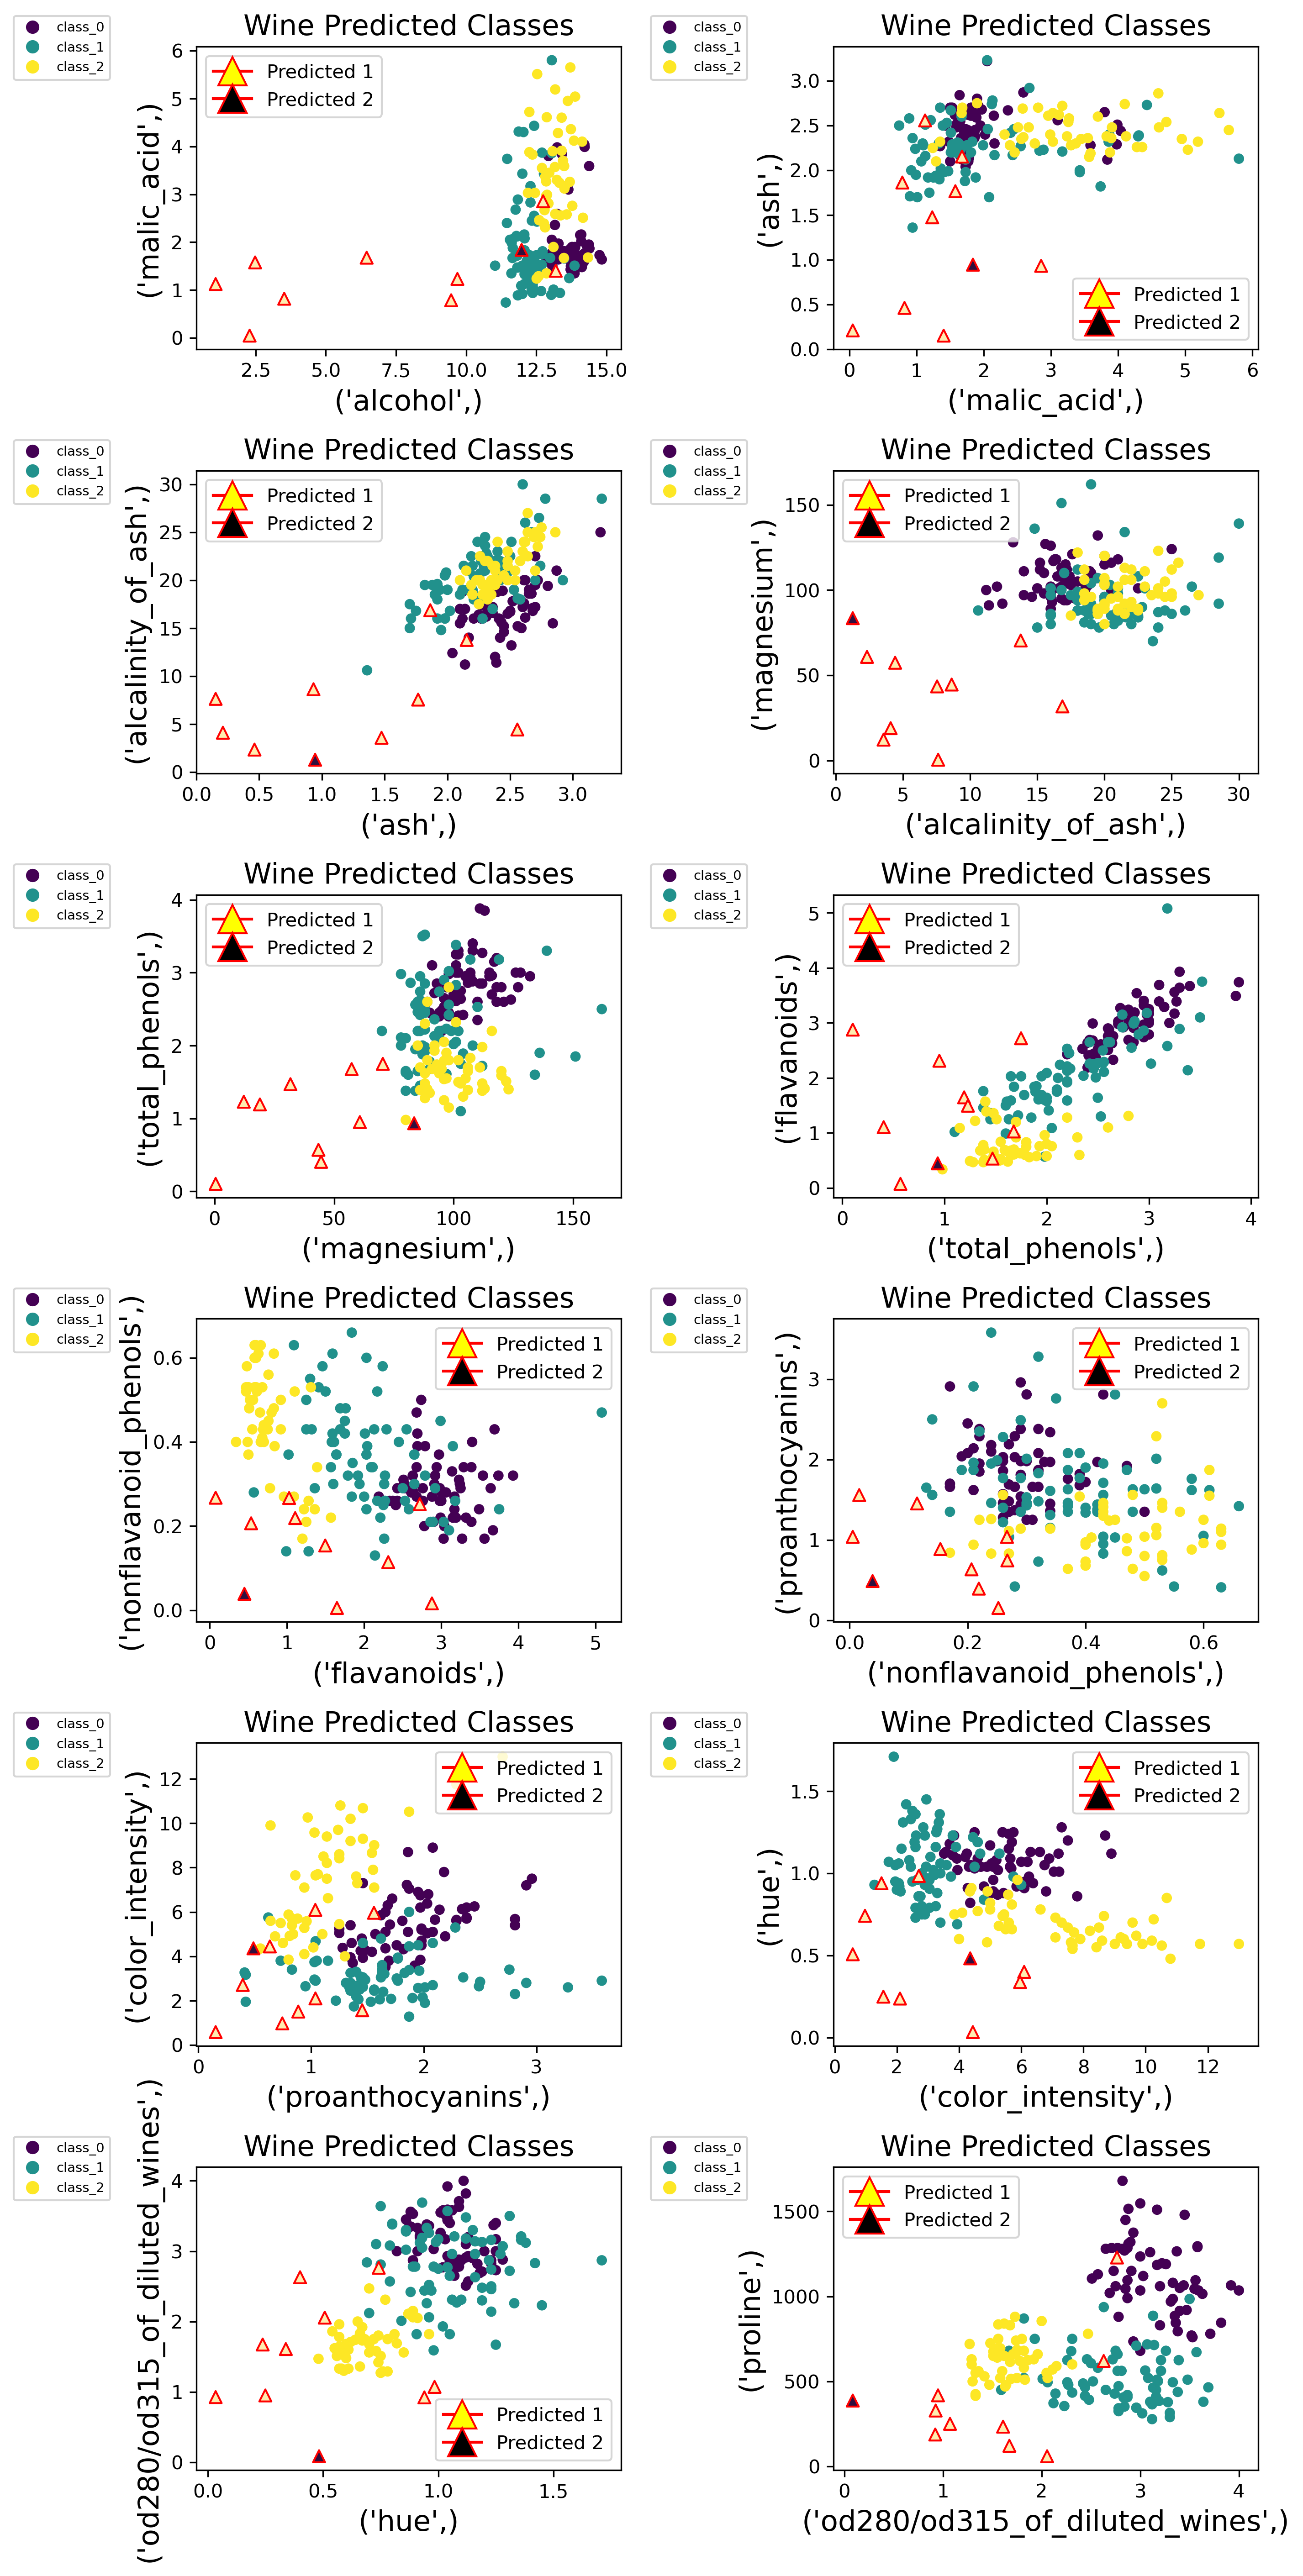

In [283]:
nrows, ncols = 7, 2 #set 6 rows and 2 columns
#custom legend for predict values
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='^', color='red', label='Predicted 1',markerfacecolor='yellow', markersize=15,),
                   Line2D([0], [0], marker='^', color='red', label='Predicted 2',markerfacecolor='black', markersize=15,)]

fig2 = plt.figure(figsize = (10,27), dpi = 300)
for i in range(1, 13): #i will iterate from 1 through 13
    ax = fig2.add_subplot(nrows, ncols, i) #add subplot one at a time (#rows and columns, i is the position)
    ax.scatter(WineData.iloc[:,i-1], WineData.iloc[:,i],c=Wine.target,s=20) #based on number of the column iloc is index location i-1 (starting point @ 0), i
    Label=Wine.target_names
    legend=ax.legend(PltScat.legend_elements()[0],Label,prop= {'size' : 7},bbox_to_anchor=(-0.43, 1.1), loc='upper left',borderaxespad=0)
    ax.add_artist(legend)
    ax.set_xlabel(WineData.columns[i-1],size=15)
    ax.set_ylabel(WineData.columns[i],size=15)
    ax.set_title('Wine Predicted Classes',size=15)
    ax.scatter(np.array(x_new)[:,i-1], np.array(x_new)[:,i],c=x_new.Class,cmap='cmo.matter',s = 40,edgecolors='red',marker='^')
    ax.legend(handles=legend_elements)
plt.subplots_adjust(wspace=0.5,hspace=0.4)
plt.show()

#You can see the overlapping of the model classes here- class 1,2,and 3 clusters are too close together.
#It is difficult to distinguish between the 3 classes. The only unknown classified as Class 2 is seen to overlap with Class 1
#multiple times (color intensity vs proanthocyanins).
#The wine scikit learn data set isn't a very good dataset to build a classification model from due to 
#the severe overlapping of all classes on the bases of most parameters.
#More defined clusters and less overlapping datasets would make the mlp model making more defined.

# SUMMARY


## EDA
```
The standard deviation for the wine model data set and the wine predict data set is pretty small (except for proline).
This could mean that parameters despite class distinctions are close to one another. When plotting the initial data with scatterplots, the defined classes (Class 0, 1, and 2) all overlap with one another.
This means clustering may be difficult and that this model may be able to define clusters clearly.
```

## HYPERPARAMETER SPACE
```
A MLPClassifier Model was built using hidden layer sizes of 10,10,10 with 1000 iterations.
The number of layers that yields the most accurate score results are at 5 & 6 (100%). 
All the other layer sizes are around or below 97%.
In general, all the layers within this range is above 90%. 
This means that each layer has the possibility of classifying things accurately. 
I would use the layer sizes that have an accuracy score of less than 1 (everything exclusing 5 & 6) because of overfitting.
(I stuck with the 10,10,10 with 1000 iterations).
If the model fits to the scikit winedataset too closely, it has less capability to classify unknowns accurately.

The confusion matrix tells us the model's prediction performance (false positives and false negatives).
For the model with the 1,1,1 layer, it classifys class 1 as class 0 which does not seem accurate.
Precision tells us what proportion of true positives are actuall correct (TP/(TP+FP).
Recall is what proportion of actual positives are identified correctly (TP/(TP+FN)).
F1 score is the model performance measurment (2*[(precision*recall)/(precision+recall)]) OR = (TP)/[(TP)+(1/2)(FP+FN)].
Any value above 0.90 for each is good.
After looking at these parameters, I still chose the 10,10,10 with 1000 iterations for the MLPClassifier.
Other layers yielded the same results (except for 1 & 2 layers), 
however I had read from literature that increased layers can improve accuracy in the model to a certain degree.
1 & 2 layers caused some classifications to be overfitted so I wouldn't use those parameters.
4 layers yielded in perfect (1) F1,precision,and recall scores, possibly due to overfitting so I did not use that either.
```

## APPLYING TUNED MODEL
```
My model is predicting the probability of the unknowns as mostly Class 1 (with a 100% certainty). 
There is one sample where it is only 28%, where it is more likely to be classified as Class 2.
In general, it is unlikely that the unknowns are Class 0 or Class 2.
This makes sense since Class 1 severely overlaps both of the other two classes, it is hard to distinguish all 3 classeswhen Class 1 overlaps in all clusters.
When plotting model clusters vs predicted classes of the unknown wine data,you can see the severe overlapping of the model classes- Class 1,2,and 3 clusters are way too close together.
The only unknown classified as Class 2 is seen to overlap with Class 1 multiple times (color intensity vs proanthocyanins).
The wine scikit learn data set isn't a very good dataset to build a classification model from due to the severe overlapping of all classes on the bases of most parameters.
More separated clusters and less overlapping model datasets would make the mlp model making more defined.
```